In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
import warnings
warnings.filterwarnings("ignore")


In [11]:
!pip install umap-learn

In [12]:
pip install --upgrade umap-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [14]:
df = sns.load_dataset("iris")


In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.shape

(150, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
numeric_cols = df.select_dtypes(include=[float, int]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


sepal_length: 0 outliers
sepal_width: 4 outliers
petal_length: 0 outliers
petal_width: 0 outliers


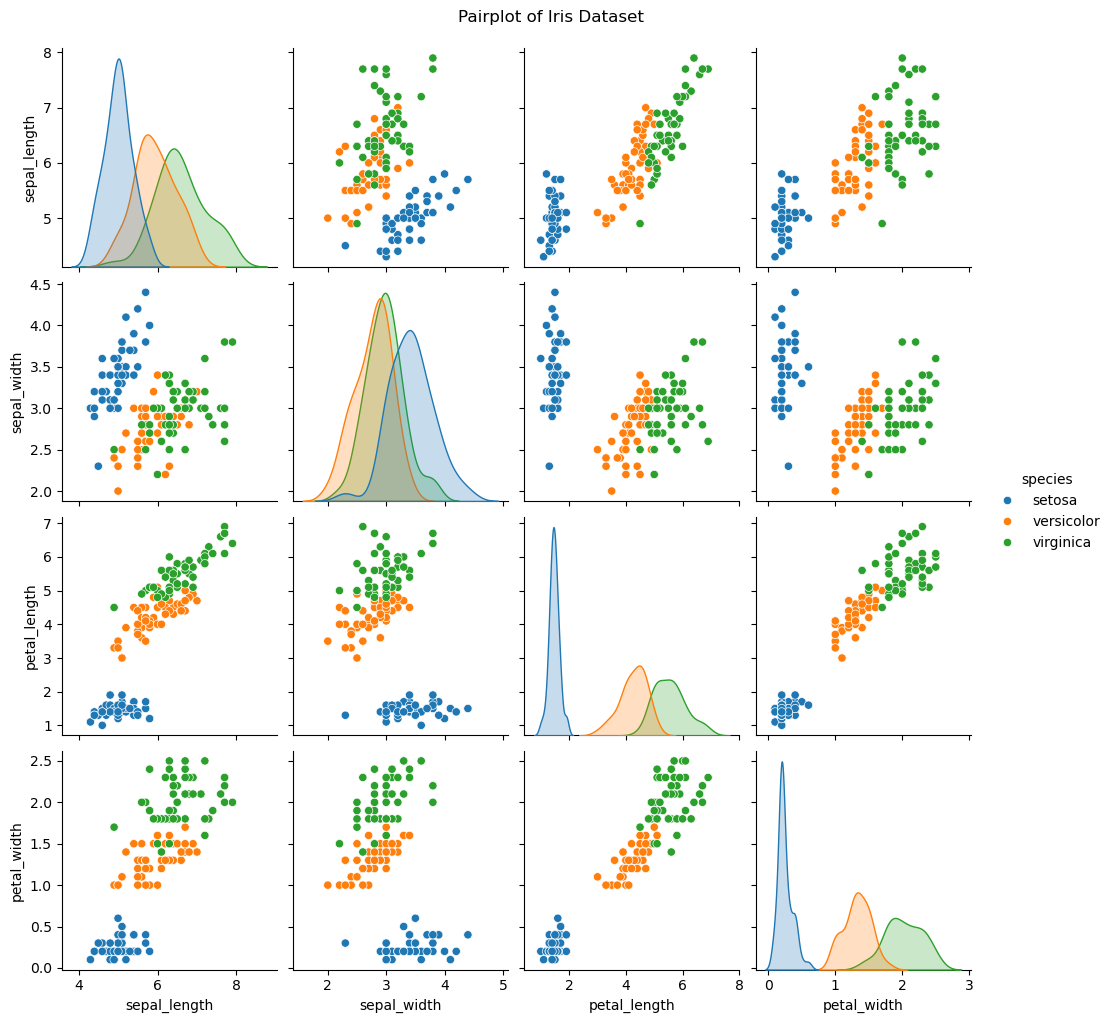

In [22]:
sns.pairplot(df, hue="species", palette="tab10")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

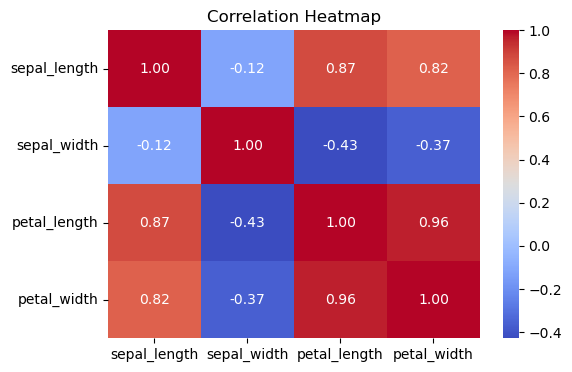

In [23]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


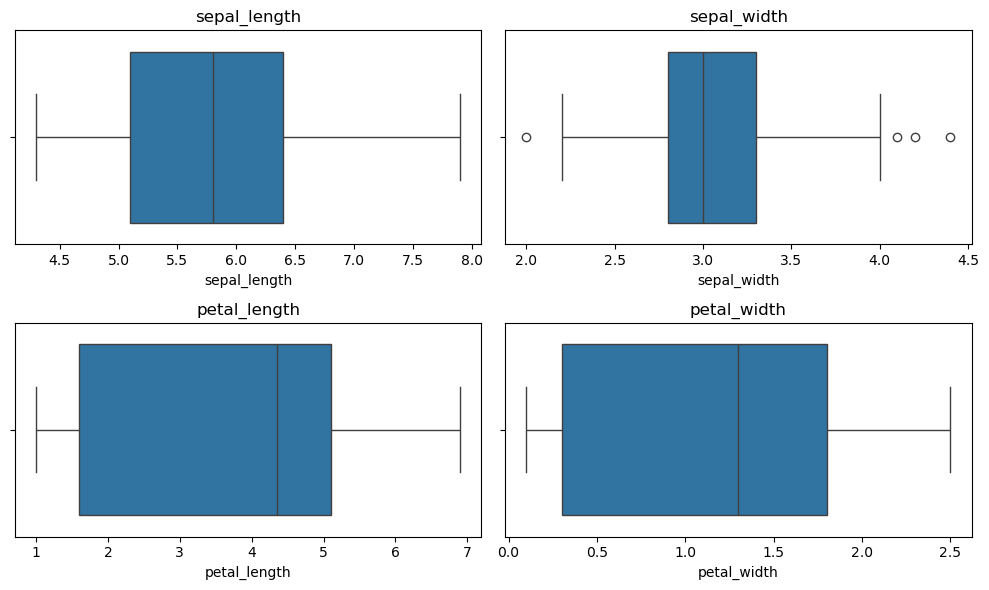

In [24]:
plt.figure(figsize=(10,6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [25]:
# Copy original df to avoid modifying directly
df_clean = df.copy()

Q1 = df_clean['sepal_width'].quantile(0.25)
Q3 = df_clean['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [27]:
# Remove outliers
df_clean = df_clean[(df_clean['sepal_width'] >= lower_bound) & (df_clean['sepal_width'] <= upper_bound)]

print("Shape before:", df.shape)
print("Shape after :", df_clean.shape)

Shape before: (150, 5)
Shape after : (146, 5)


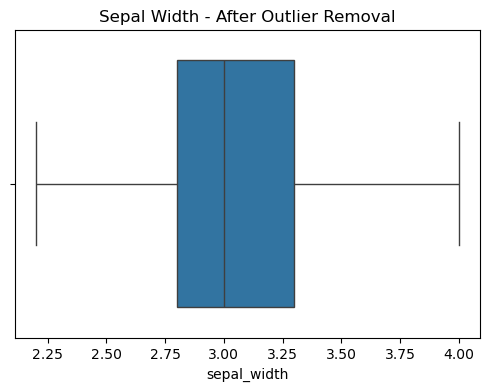

In [28]:
# Boxplot after outlier removal
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean['sepal_width'])
plt.title("Sepal Width - After Outlier Removal")
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features
X = df_clean.drop("species", axis=1)
y = df_clean["species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


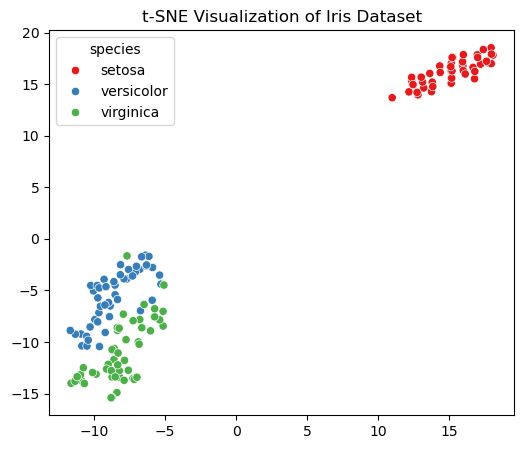

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette="Set1")
plt.title("t-SNE Visualization of Iris Dataset")
plt.show()


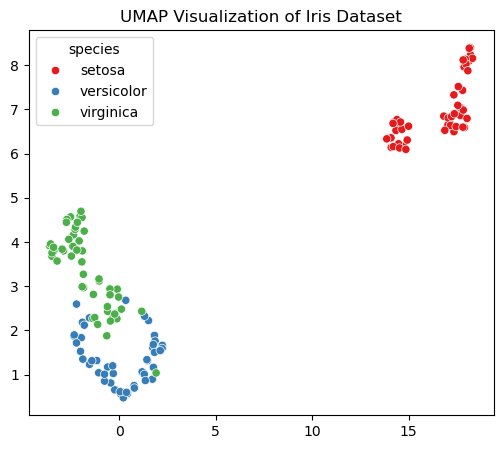

In [35]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)

# Apply UMAP on scaled data
X_umap = umap_model.fit_transform(X_scaled)

# Plot UMAP results
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y, palette="Set1")
plt.title("UMAP Visualization of Iris Dataset")
plt.show()
